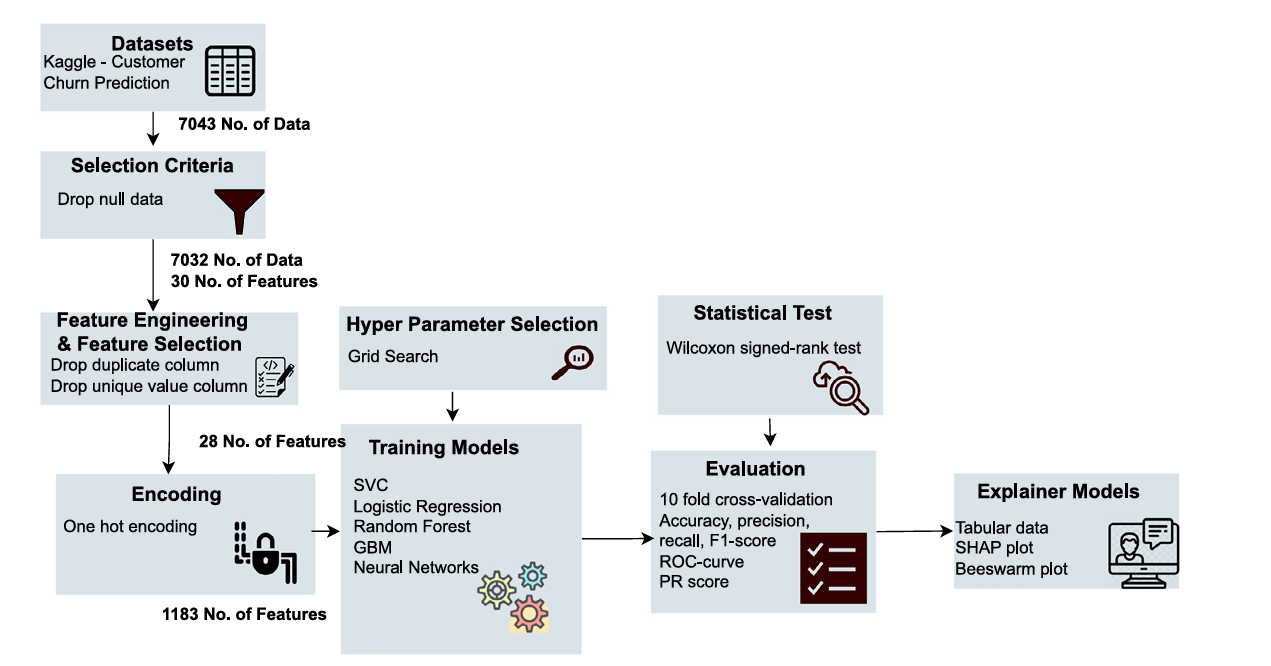

In [138]:
!pip install lazypredict

In [139]:
pip install mlflow

In [140]:
!pip install lime

In [141]:
# Import libraries
import pandas as pd
import numpy as np
import mlflow
import plotly.express as px

import mlflow.sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTEENN
import shap
import lime
import lime.lime_tabular
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [142]:
# Load datasets
data_80 = pd.read_csv('/content/churn-bigml-20.csv')
data_20 = pd.read_csv('/content/churn-bigml-80.csv')

# Concatenate datasets by rows
data = pd.concat([data_80, data_20], axis=0, ignore_index=True)


In [143]:
data.shape

(3333, 20)

In [144]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,False
1,IN,65,415,No,No,0,129.10,137,21.95,228.50,83,19.42,208.80,111,9.40,12.70,6,3.43,4,True
2,NY,161,415,No,No,0,332.90,67,56.59,317.80,97,27.01,160.60,128,7.23,5.40,9,1.46,4,True
3,SC,111,415,No,No,0,110.40,103,18.77,137.30,102,11.67,189.60,105,8.53,7.70,6,2.08,2,False
4,HI,49,510,No,No,0,119.30,117,20.28,215.10,109,18.28,178.70,90,8.04,11.10,1,3.00,1,False


In [145]:
data.columns.astype(str)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [147]:
missing_values = data.isnull().sum()
missing_values

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [148]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [149]:
sum(data.duplicated())

0

In [150]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x else 0)

In [151]:
data['Churn'].value_counts()

,count
Churn,
0,2850
1,483


In [152]:
# Categorical Columns
categorical_cols = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']

# Continuous Columns
continuous_cols = [col for col in data.columns if col not in categorical_cols]

### Univariate analysis

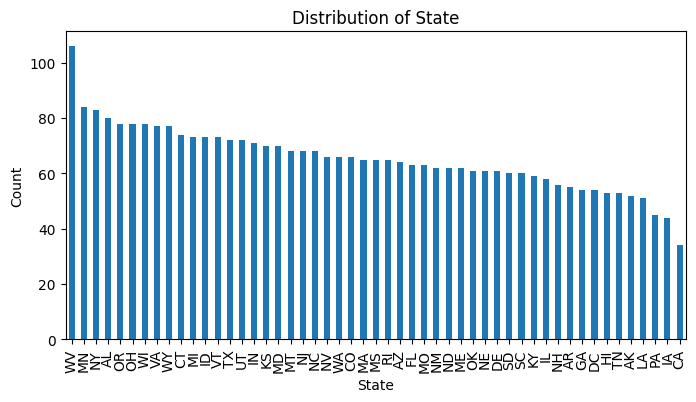

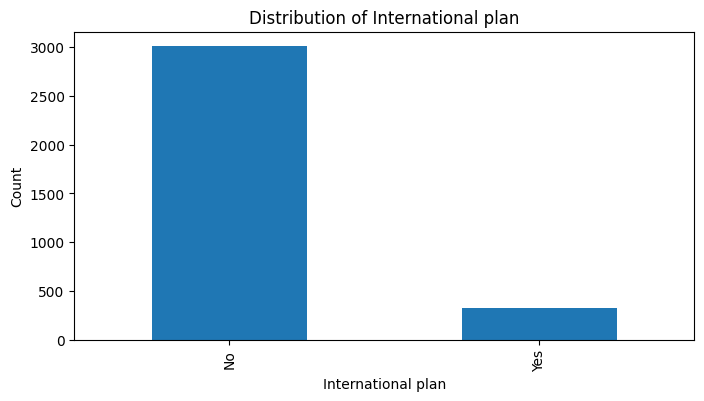

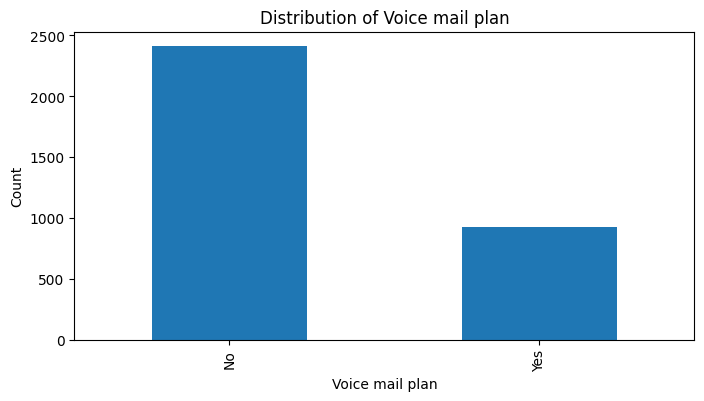

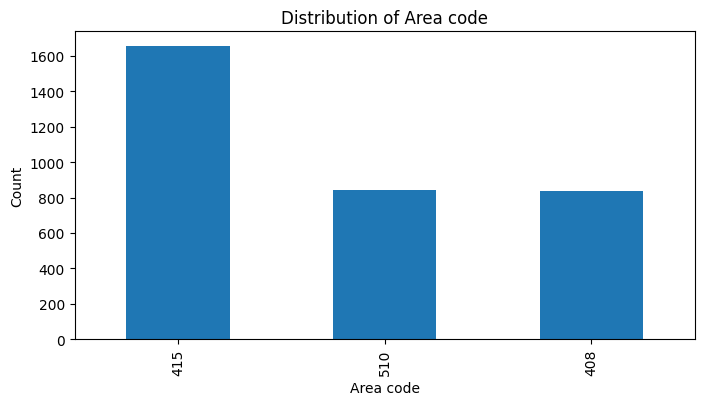

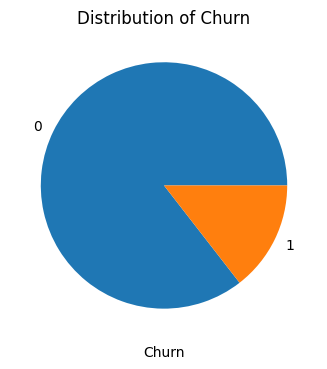

In [153]:
# Plotting categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar' if col != 'Churn' else 'pie')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count' if col != 'Churn' else '')
    plt.xlabel(col)
    plt.show()

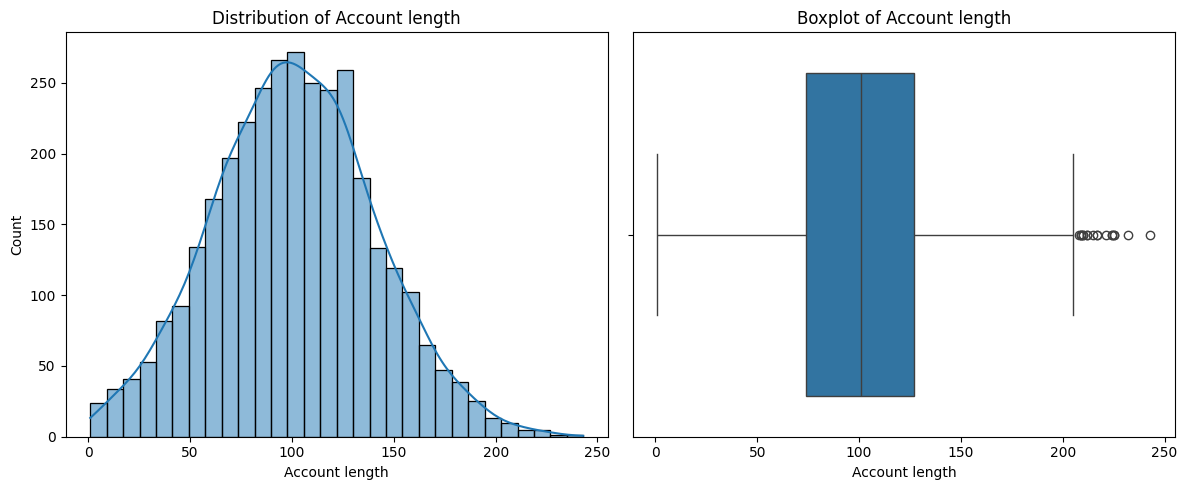

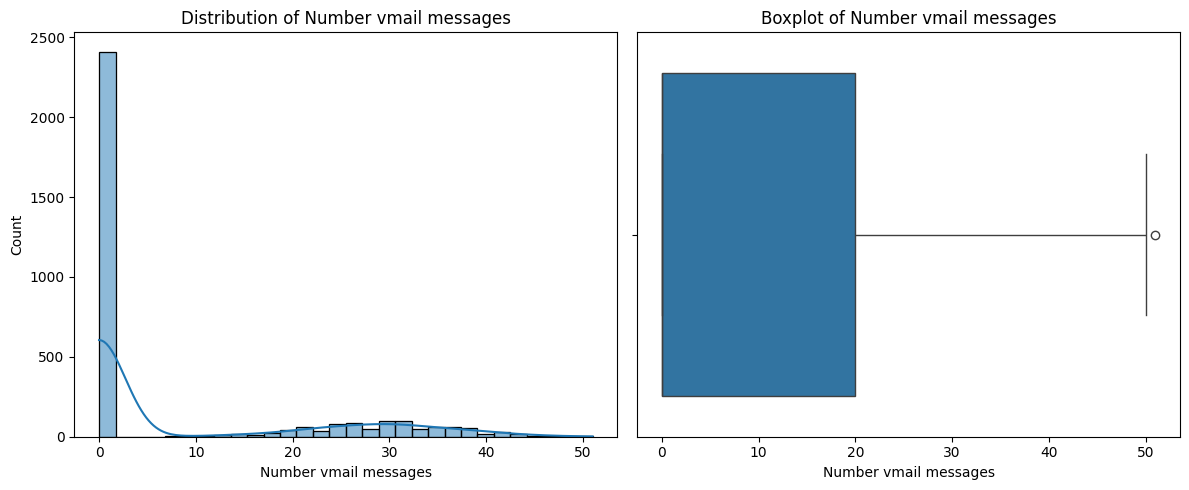

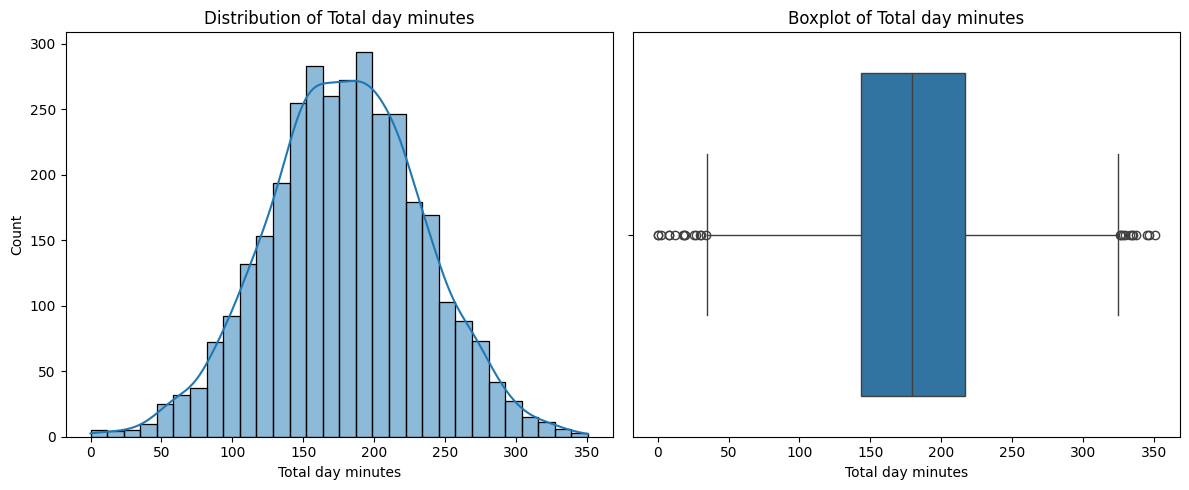

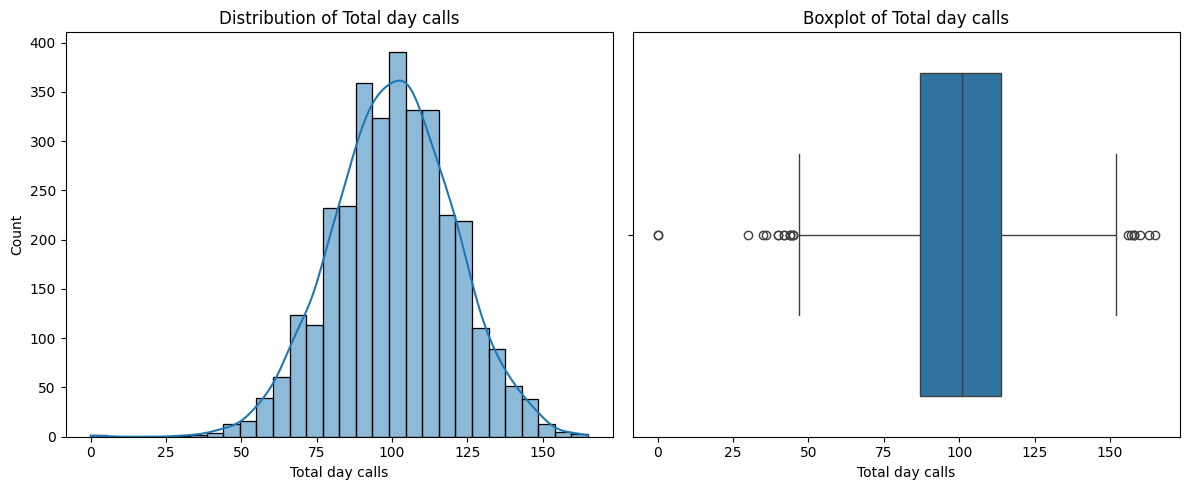

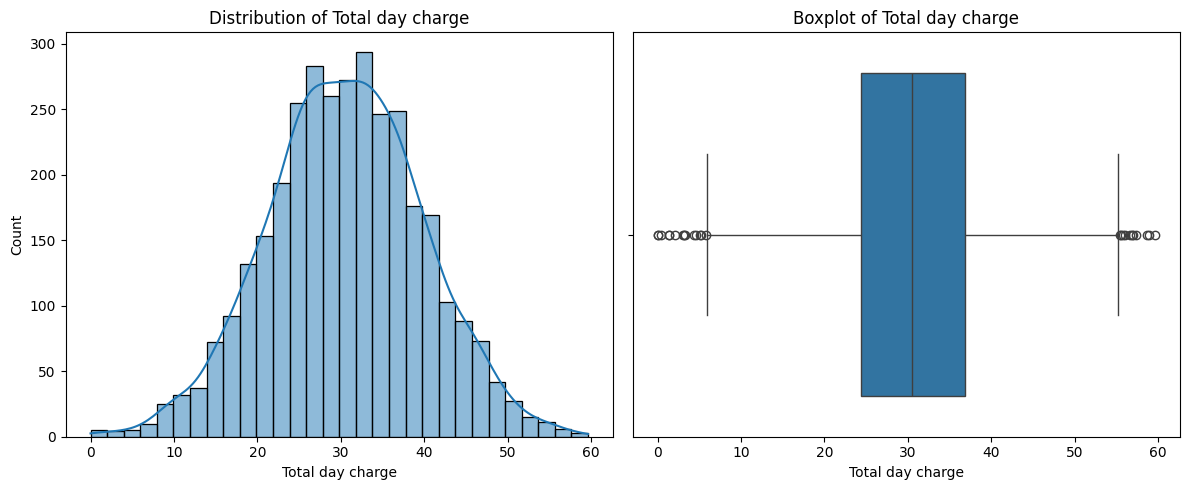

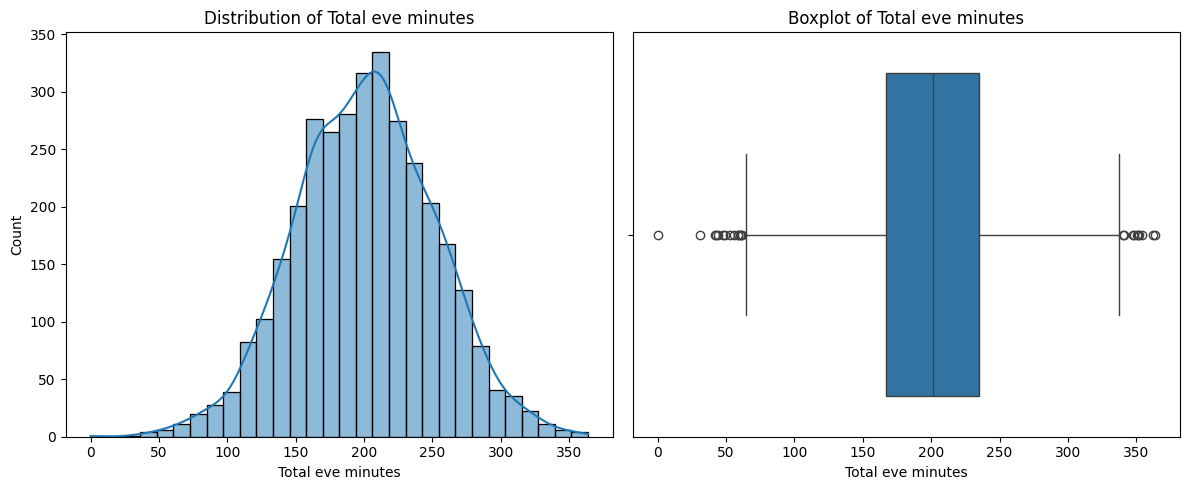

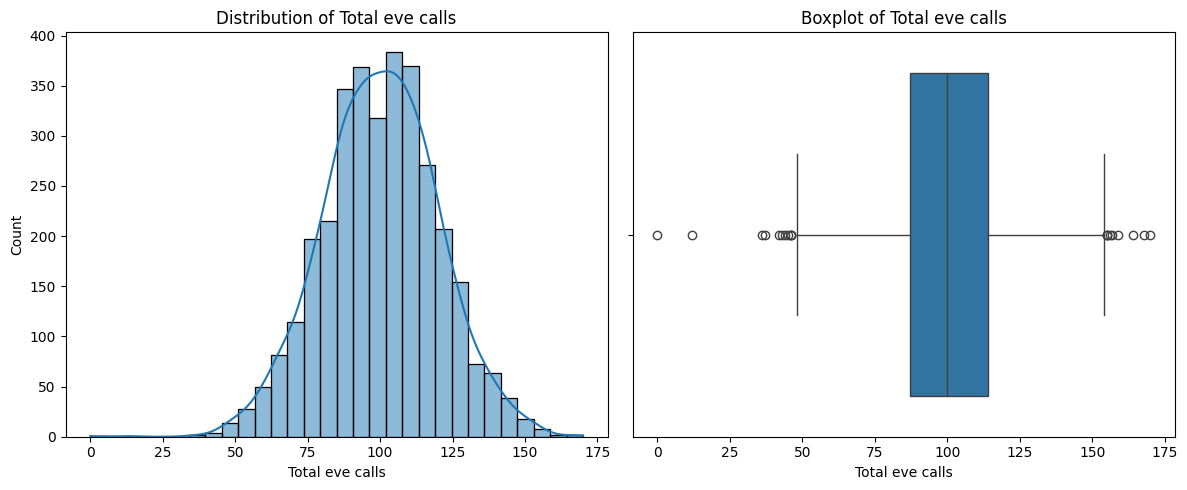

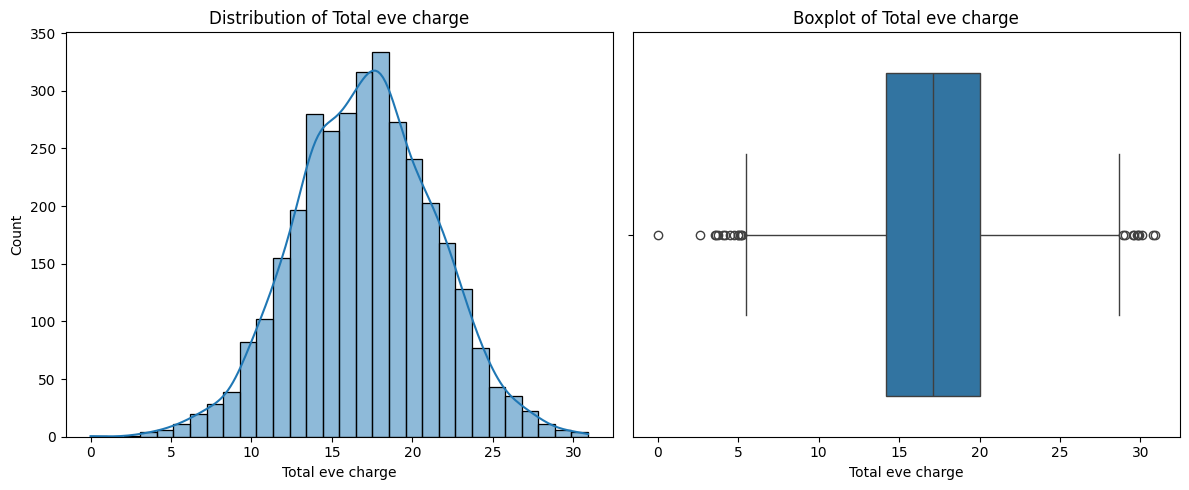

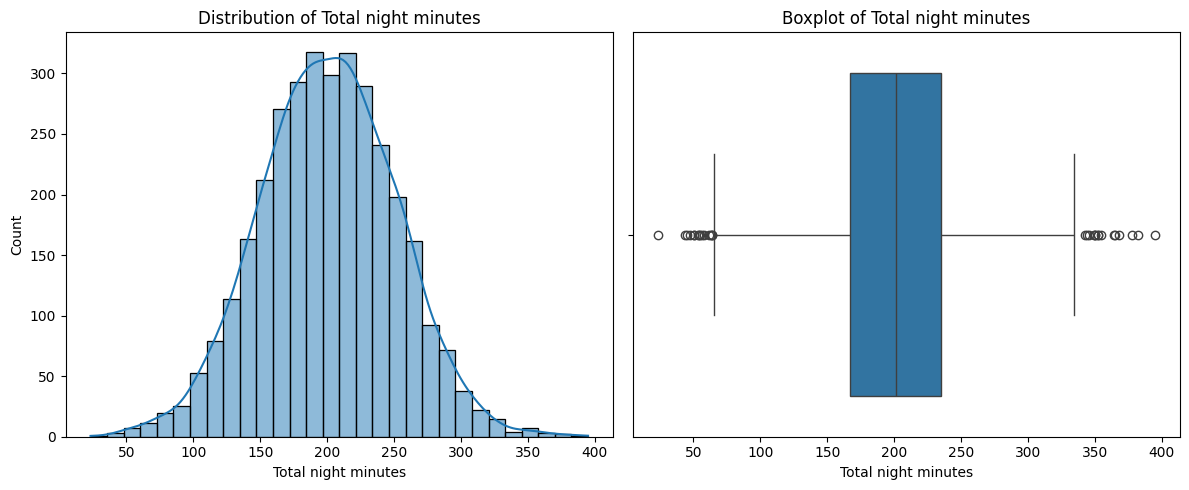

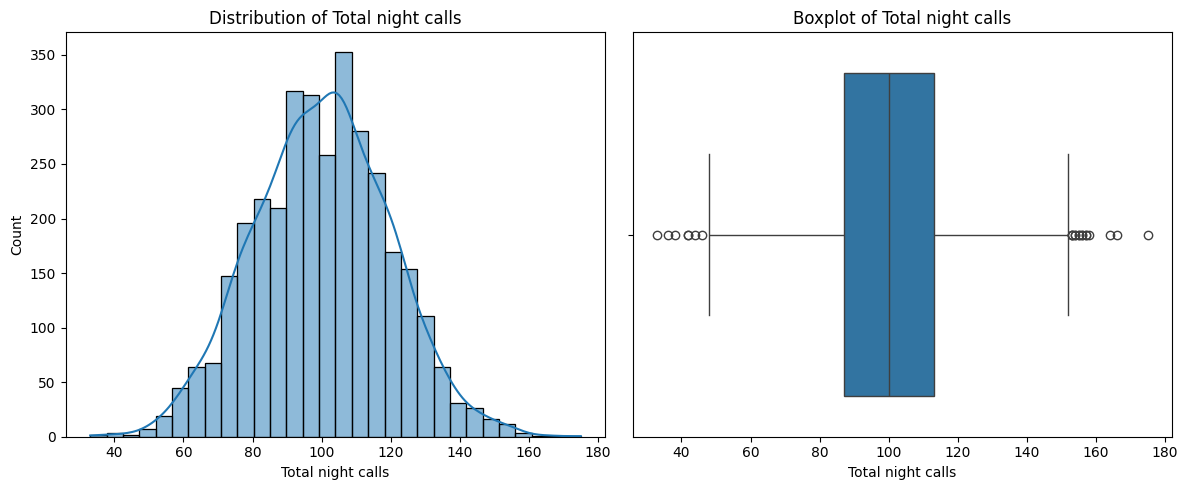

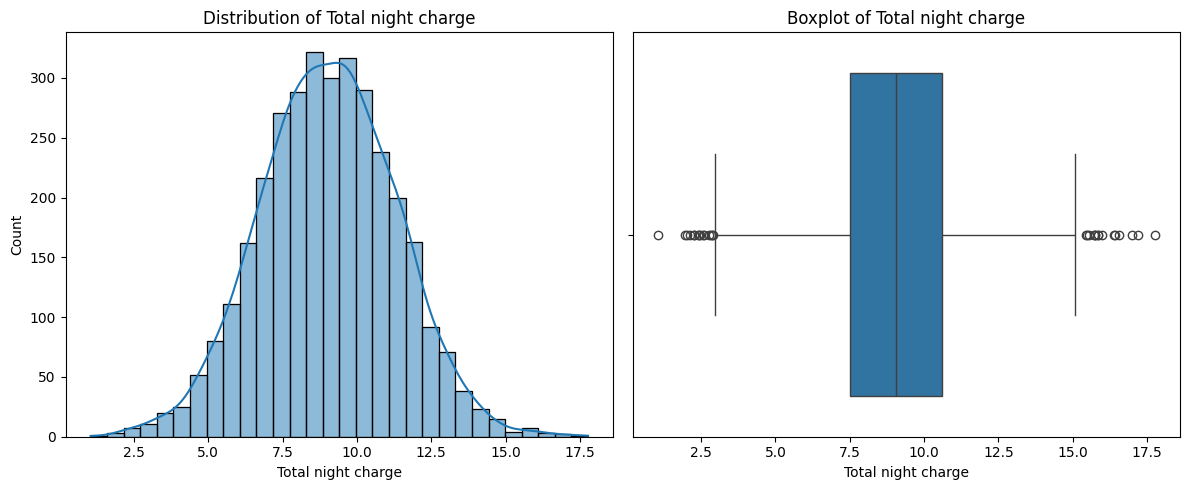

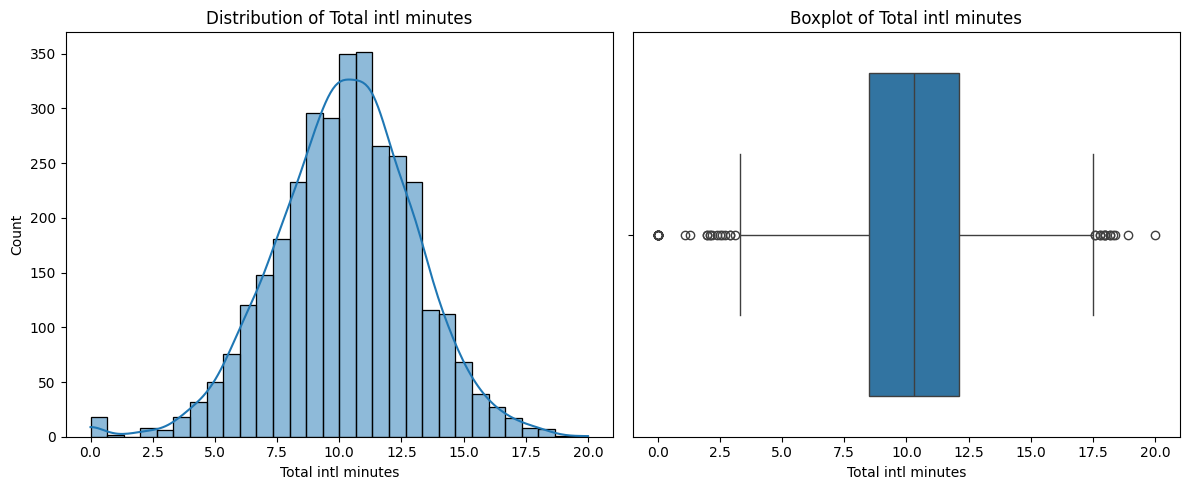

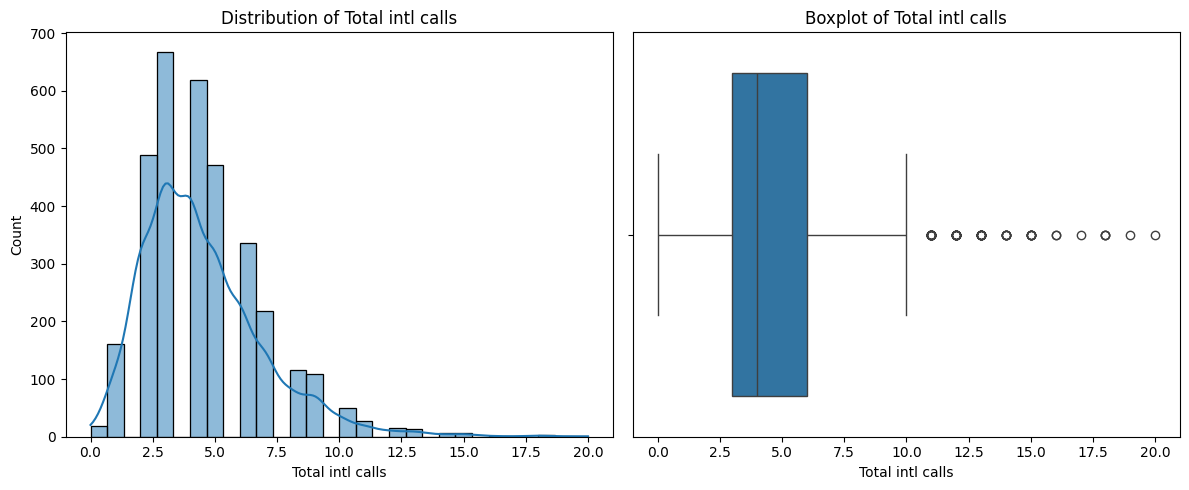

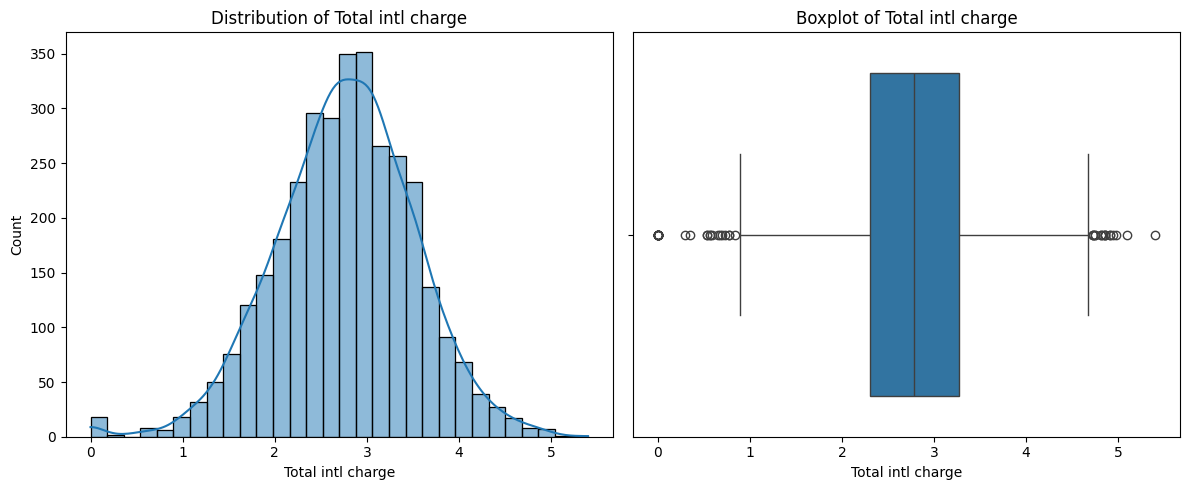

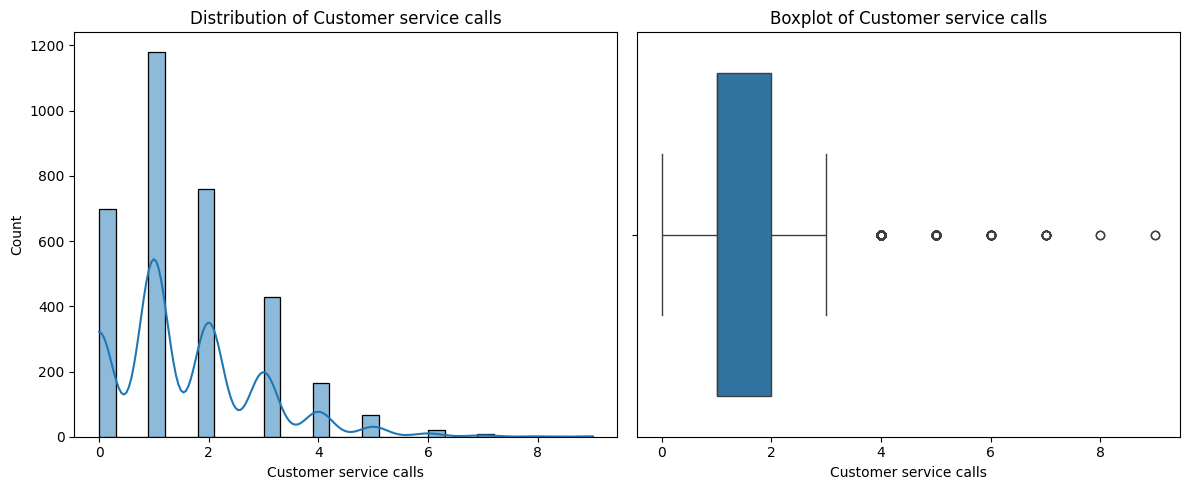

In [154]:

# Plotting continuous columns
for col in continuous_cols:
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Bivariate analysis

In [160]:
import plotly.express as px

# Calculate total charges and store it in a separate variable for EDA
total_charges = (
    data['Total day charge'] +
    data['Total eve charge'] +
    data['Total night charge'] +
    data['Total intl charge']
)

# Create a DataFrame for EDA with churn and total charges
eda_df = pd.DataFrame({
    'Total Charges': total_charges,
    'Churn': data['Churn']
})

# Plot the scatter plot with Plotly
fig = px.scatter(
    eda_df,
    x='Total Charges',
    y=eda_df.index,
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},  # Non-churn: blue, Churn: red
    labels={'y': 'Customer Index'},
    title='Scatter Plot of Total Charges with Churn Status'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Total Charges",
    yaxis_title="Customer Index",
    legend_title="Churn Status",
    template="plotly_white"
)

# Show the plot
fig.show()


In [155]:
# Aggregate churn and non-churn counts per state
state_churn_data = data.groupby(['State', 'Churn']).size().unstack(fill_value=0).reset_index()
state_churn_data.columns = ['State', 'Non_Churn', 'Churn']

# Prepare the map data
state_churn_data['Total'] = state_churn_data['Churn'] + state_churn_data['Non_Churn']

# Plot a choropleth map
fig = px.choropleth(
    state_churn_data,
    locations='State',
    locationmode='USA-states',
    color='Churn',  # Color based on churn count
    hover_data=['State', 'Churn', 'Non_Churn', 'Total'],
    scope='usa',
    color_continuous_scale='Reds',
    title="Churn and Non-Churn Counts Per State"
)

# Show the map
fig.show()

In [158]:
# Aggregate the total customer service calls per state
state_calls_data = data.groupby('State')['Customer service calls'].sum().reset_index()

# Plot a choropleth map
fig = px.choropleth(
    state_calls_data,
    locations='State',
    locationmode='USA-states',
    color='Customer service calls',  # Color based on total calls
    hover_data=['State', 'Customer service calls'],
    scope='usa',
    color_continuous_scale='Blues',
    title="Customer Service Calls Per State"
)

# Show the map
fig.show()

In [119]:
data['State'].value_counts()

,count
State,
WV,106
MN,84
NY,83
AL,80
OR,78
OH,78
WI,78
VA,77
WY,77


In [120]:
# Comprehensive mapping of U.S. states to regions
region_mapping = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South',
    'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South',
    'WV': 'South', 'DC': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West'
}


In [121]:
# Map states to regions
data['Region'] = data['State'].map(region_mapping)

In [122]:
data.drop(columns='State', inplace=True)

In [123]:
# Apply one-hot encoding to selected columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Convert boolean (or binary) columns to integers
data = data_encoded.astype(int)

# Display the resulting DataFrame
data.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes,Region_Northeast,Region_South,Region_West
0,117,408,0,184,97,31,351,80,29,215,...,8,4,2,1,0,0,0,0,1,0
1,65,415,0,129,137,21,228,83,19,208,...,12,6,3,4,1,0,0,0,0,0
2,161,415,0,332,67,56,317,97,27,160,...,5,9,1,4,1,0,0,1,0,0
3,111,415,0,110,103,18,137,102,11,189,...,7,6,2,2,0,0,0,0,1,0
4,49,510,0,119,117,20,215,109,18,178,...,11,1,3,1,0,0,0,0,0,1


In [124]:
data.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes,Region_Northeast,Region_South,Region_West
0,117,408,0,184,97,31,351,80,29,215,...,8,4,2,1,0,0,0,0,1,0
1,65,415,0,129,137,21,228,83,19,208,...,12,6,3,4,1,0,0,0,0,0
2,161,415,0,332,67,56,317,97,27,160,...,5,9,1,4,1,0,0,1,0,0
3,111,415,0,110,103,18,137,102,11,189,...,7,6,2,2,0,0,0,0,1,0
4,49,510,0,119,117,20,215,109,18,178,...,11,1,3,1,0,0,0,0,0,1


In [125]:
data.shape

(3333, 22)

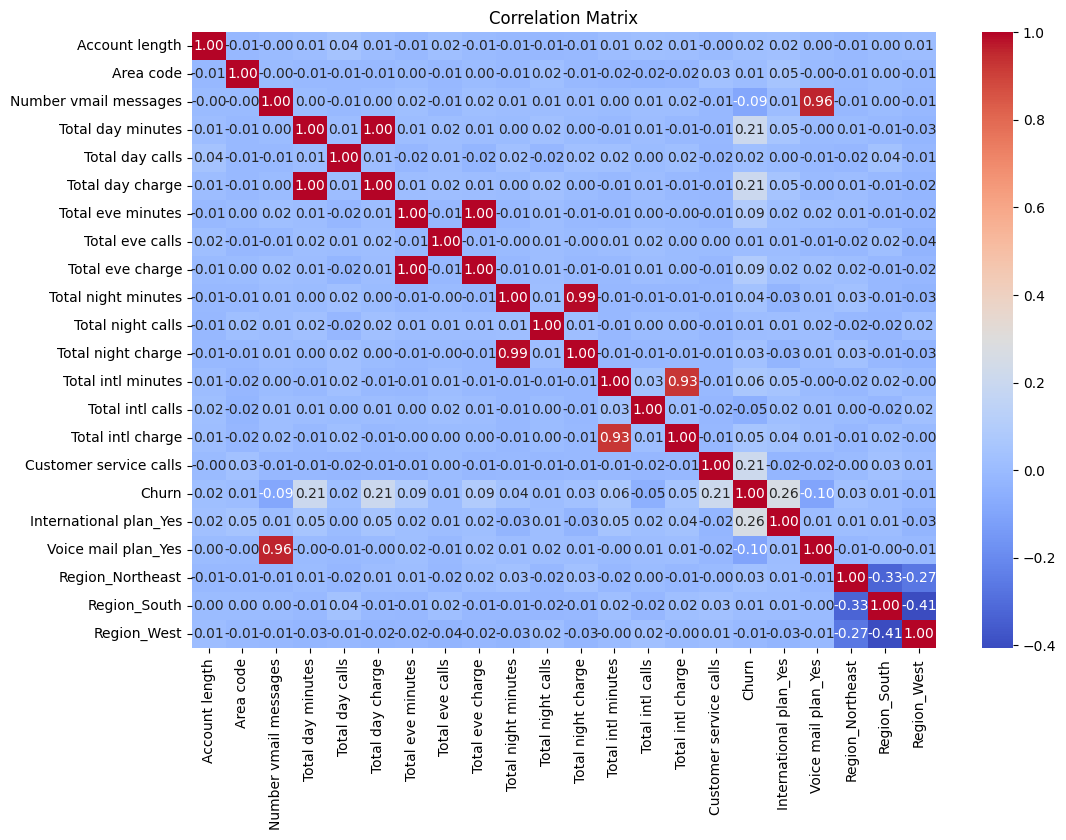

In [126]:
# Feature Correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

• Strong correlation exists between tenure and total charges, means as tenure increases so does total charges.  
• Strong correlation exists between monthly charges and total charges as well.  
• Tenure and Contract duration seems to be strong factors in determining churn.  
• Among service types, phone service seems to be most popular.  
• CSP should investigate if customers receiving digital invoice have any concern with understanding the bill details.  
• Also, they should encourage customers to move to automated payment modes to improve customer experience.  
• Gender does not play an important role. However, CSPs should take care of the experience of senior citizens.

In [127]:
"""# Outlier Detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]"""

'# Outlier Detection\nQ1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR = Q3 - Q1\ndata = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]'

In [128]:
# Splitting features and target
X = data.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data['Churn']

In [129]:
data.shape

(3333, 22)

In [130]:
# Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2024/12/04 20:38:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '63f47bcd8d5e40fb98db50c924466de3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/04 20:38:26 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/04 20:38:26 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


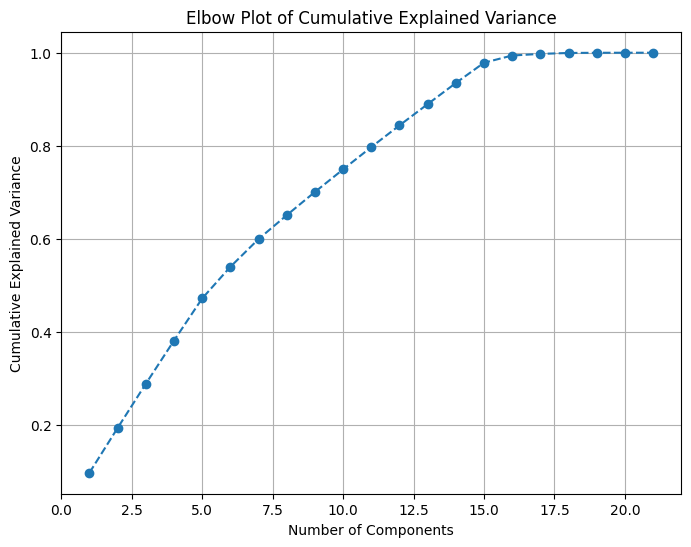

In [131]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is your input data (preprocessed)
X_pca = PCA().fit(X_scaled)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X_pca.explained_variance_ratio_) + 1),
         np.cumsum(X_pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Elbow Plot of Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [132]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

2024/12/04 20:38:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c5a4616299ff4709ad0113d62b9cb5ed', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/04 20:38:29 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/04 20:38:29 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [133]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to handle class imbalance
X_resampled, y_resampled = smote_enn.fit_resample(X_pca, y)

# Display the new shape of the data
print(f"Original dataset shape: {X_pca.shape, y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape, y_resampled.shape}")


2024/12/04 20:38:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2ff852cf93fc4b1296c29efb6d769fda', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/04 20:38:31 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/04 20:38:31 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/12/04 20:38:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/12/04 20:38:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signatu

Original dataset shape: ((3333, 15), (3333,))
Resampled dataset shape: ((4809, 15), (4809,))


In [134]:
y_resampled.value_counts()

,count
Churn,
1,2779
0,2030


In [135]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [136]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import roc_auc_score

# Initialize the LazyRegressor
Lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=roc_auc_score)

# Fit the LazyRegressor and get predictions
models, predictions = Lazy_classifier.fit(X_train, X_test, y_train, y_test)

 55%|█████▍    | 17/31 [01:26<01:16,  5.47s/it]2024/12/04 20:40:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4d4071df083a48ca8c9d762e5bf81608', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/04 20:40:08 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: Pipeline has none of the following attributes: predict_proba, decision_function.
2024/12/04 20:40:08 WARNING mlflow.sklearn.utils: PrecisionRecallDisplay.from_estimator failed. The artifact training_precision_recall_curve will not be recorded. Artifact error: Pipeline has none of the following attributes: predict_proba, decision_function.
 61%|██████▏   | 19/31 [01:52<01:10,  5.91s/it]


KeyboardInterrupt: 

In [ ]:
models

In [ ]:
# @title ROC AUC

from matplotlib import pyplot as plt
models['ROC AUC'].plot(kind='line', figsize=(15, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# @title Time Taken vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Accuracy')

In [ ]:
# @title Accuracy

from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Define the model (replace with your model)
model = GradientBoostingClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=10, scoring='accuracy')

# Print the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean accuracy across all folds:", cv_scores.mean())
print("Standard deviation across all folds:", cv_scores.std())


In [ ]:
param_grids = {
    'SVC': {
        'model': SVC(),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 464.0812108]}
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [5.15e-05, 0.001, 0.01, 1, 100, 4534347.358]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_depth': range(19, 25),
            'n_estimators': range(19, 25)
        }
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(5,), (6,), (7,), (8,), (9,)],
            'activation': ['relu'],
            'solver': ['adam']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': range(50, 501, 50),
            'learning_rate': [0.01, 0.1, 0.3, 0.5, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': range(500, 1100, 100),
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
        }
    }
}


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

# Enable MLflow autologging
mlflow.autolog()

# Placeholder to store results
best_models = {}

# Set up MLflow experiment (optional)
mlflow.set_experiment("Models Grid Search")

# Perform Grid Search for each model
for name, config in param_grids.items():
    with mlflow.start_run(run_name=name):  # Start a new run for each model
        print(f"Starting Grid Search for {name}...")

        # Grid Search
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                                   scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
        grid_search.fit(X_resampled, y_resampled)  # Replace with your dataset

        # Extract and save the best estimator
        best_models[name] = grid_search.best_estimator_

        print(f"Best params for {name}: {grid_search.best_params_}\n")

# Display all best models
print("Best Models and Hyperparameters:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


In [ ]:
import pickle

# Save best parameters and models to a file
with open('best_models.pkl', 'wb') as f:
    pickle.load(best_models, f)


In [ ]:
"""from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Generate confusion matrices
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    print("********************************************************")
    # Evaluate metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
    print("********************************************************")

    plot_confusion_matrix(y_test, y_pred, model_name)

"""

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Create and train GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

# 2. Make predictions
y_pred = gbm_model.predict(X_test)

# 3. Evaluate metrics
print("********************************************************")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])}")
print("********************************************************")

# 4. Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for GBM
plot_confusion_matrix(y_test, y_pred, "Gradient Boosting Machine")

# 5. SHAP Explainer and Summary Plot
# Create SHAP explainer for GBM model
explainer = shap.TreeExplainer(gbm_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary plot (Beeswarm)
print("SHAP Summary Plot for Gradient Boosting Machine")
shap.summary_plot(shap_values, X_test)

# SHAP Summary plot (Bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)



# Summary plot
shap.summary_plot(shap_values[1], X_test)

# Beeswarm plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


### Deep Learning

In [ ]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Build the model
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid for classification


In [ ]:
#compile model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x,y,epochs=100,batch_size=50,verbose=1) # fit model
model.summary()


In [ ]:
scores=model.evaluate(x,y)


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))


In [ ]:
# Import necessary libraries
import tensorflow as tf

# Build the RNN model
model_rnn = tf.keras.Sequential([
    # First RNN layer with regularization
    tf.keras.layers.SimpleRNN(128, input_shape=(X_train.shape[1], 1), activation="tanh",
                              return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    # Second RNN layer with regularization
    tf.keras.layers.SimpleRNN(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    # Third RNN layer with regularization
    tf.keras.layers.SimpleRNN(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    # Final RNN layer before the output
    tf.keras.layers.SimpleRNN(2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    # Dense output layer with sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Define early stopping
early_stopping_rnn = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

# Display the model summary
model_rnn.summary()


### LSTM

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], 1), activation="tanh",
                         return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.LSTM(2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")])

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

model_lstm.summary()

In [ ]:
history_lstm = model_lstm.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

In [ ]:
loss_and_metrics = model_lstm.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

In [ ]:
plt.figure(figsize=(10, 6))

train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
predicted = model_lstm.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)


In [ ]:
predicted[:10]


In [ ]:
cm = confusion_matrix(y_test, predicted)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()